In [1]:
# > 過学習を防止するための，最良の解決策は，より多くの訓練用データを使うことです．
# > 多くのデータで訓練を行えば行うほど，モデルは自然により汎化していく様になります．
# > これが不可能な場合，次善の策は正則化のようなテクニックを使うことです．
# > 正則化は，モデルに保存される情報の量とタイプに制約を課すものです．
# > ネットワークが少数のパターンしか記憶できなければ，最適化プロセスにより、
# > 最も主要なパターンのみを学習することになり，より汎化される可能性が高くなります．

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

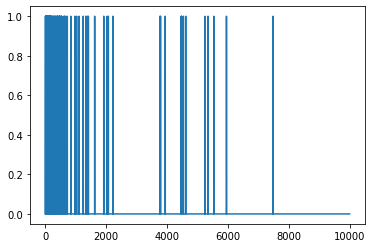

In [4]:
plt.plot(train_data[0])

In [5]:
# > 過学習を防止するための最も単純な方法は，モデルのサイズ，すなわち
# > モデル内の学習可能なパラメータの数を小さくすることです．
# > モデルの学習可能なパラメータ数を「キャパシティ」と呼ぶ
# > 本当のチャレンジは汎化であって適応ではない
# > モデルのキャパシティが小さいと，より予測性能が高い「圧縮」された表現を学習しなければならない
# > モデルの適切なサイズやアーキを決定する魔法の方程式は存在しない

In [7]:
baseline_model = keras.Sequential(
    [
     keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid'),
    ]
)

baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Epoch 1/20
49/49 - 3s - loss: 0.5196 - accuracy: 0.7577 - binary_crossentropy: 0.5196 - val_loss: 0.3649 - val_accuracy: 0.8748 - val_binary_crossentropy: 0.3649
Epoch 2/20
49/49 - 2s - loss: 0.2660 - accuracy: 0.9109 - binary_crossentropy: 0.2660 - val_loss: 0.2911 - val_accuracy: 0.8849 - val_binary_crossentropy: 0.2911
Epoch 3/20
49/49 - 2s - loss: 0.1913 - accuracy: 0.9342 - binary_crossentropy: 0.1913 - val_loss: 0.2880 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2880
Epoch 4/20
49/49 - 2s - loss: 0.1502 - accuracy: 0.9505 - binary_crossentropy: 0.1502 - val_loss: 0.3037 - val_accuracy: 0.8818 - val_binary_crossentropy: 0.3037
Epoch 5/20
49/49 - 2s - loss: 0.1213 - accuracy: 0.9619 - binary_crossentropy: 0.1213 - val_loss: 0.3314 - val_accuracy: 0.8764 - val_binary_crossentropy: 0.3314
Epoch 6/20
49/49 - 2s - loss: 0.0965 - accuracy: 0.9718 - binary_crossentropy: 0.0965 - val_loss: 0.3605 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.3605
Epoch 7/20
49/49 - 2s - loss

In [10]:
smaller_model = keras.Sequential(
    [
     keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
     keras.layers.Dense(4, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid'),
    ]
)

smaller_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"],
)

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Epoch 1/20
49/49 - 3s - loss: 0.6280 - accuracy: 0.7300 - binary_crossentropy: 0.6280 - val_loss: 0.5557 - val_accuracy: 0.8284 - val_binary_crossentropy: 0.5557
Epoch 2/20
49/49 - 2s - loss: 0.4682 - accuracy: 0.8682 - binary_crossentropy: 0.4682 - val_loss: 0.4245 - val_accuracy: 0.8744 - val_binary_crossentropy: 0.4245
Epoch 3/20
49/49 - 2s - loss: 0.3404 - accuracy: 0.9024 - binary_crossentropy: 0.3404 - val_loss: 0.3404 - val_accuracy: 0.8833 - val_binary_crossentropy: 0.3404
Epoch 4/20
49/49 - 2s - loss: 0.2641 - accuracy: 0.9173 - binary_crossentropy: 0.2641 - val_loss: 0.3037 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.3037
Epoch 5/20
49/49 - 2s - loss: 0.2209 - accuracy: 0.9285 - binary_crossentropy: 0.2209 - val_loss: 0.2880 - val_accuracy: 0.8897 - val_binary_crossentropy: 0.2880
Epoch 6/20
49/49 - 2s - loss: 0.1920 - accuracy: 0.9370 - binary_crossentropy: 0.1920 - val_loss: 0.2838 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2838
Epoch 7/20
49/49 - 2s - loss

In [14]:
bigger_model = keras.models.Sequential(
    [
     keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
     keras.layers.Dense(512, activation='relu'),
     keras.layers.Dense(1, activation="sigmoid"),
    ]
)

bigger_model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy', "binary_crossentropy"],
)

bigger_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Epoch 1/20
49/49 - 12s - loss: 0.3432 - accuracy: 0.8574 - binary_crossentropy: 0.3432 - val_loss: 0.3516 - val_accuracy: 0.8537 - val_binary_crossentropy: 0.3516
Epoch 2/20
49/49 - 10s - loss: 0.1492 - accuracy: 0.9444 - binary_crossentropy: 0.1492 - val_loss: 0.3243 - val_accuracy: 0.8754 - val_binary_crossentropy: 0.3243
Epoch 3/20
49/49 - 10s - loss: 0.0541 - accuracy: 0.9837 - binary_crossentropy: 0.0541 - val_loss: 0.4375 - val_accuracy: 0.8674 - val_binary_crossentropy: 0.4375
Epoch 4/20
49/49 - 10s - loss: 0.0094 - accuracy: 0.9980 - binary_crossentropy: 0.0094 - val_loss: 0.5811 - val_accuracy: 0.8678 - val_binary_crossentropy: 0.5811
Epoch 5/20
49/49 - 10s - loss: 0.0010 - accuracy: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6955 - val_accuracy: 0.8698 - val_binary_crossentropy: 0.6955
Epoch 6/20
49/49 - 10s - loss: 2.4483e-04 - accuracy: 1.0000 - binary_crossentropy: 2.4483e-04 - val_loss: 0.7472 - val_accuracy: 0.8690 - val_binary_crossentropy: 0.7472
Epoch 7/20
49/

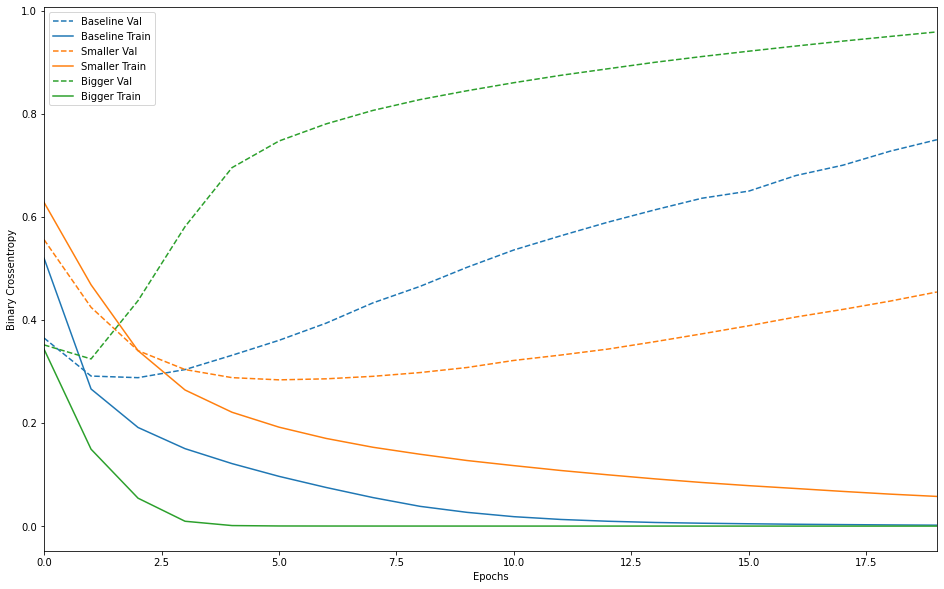

In [17]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [ ]:
# > 単純なモデルとは，モデルのパラメータ値の分布のエントロピーが小さいもの，
# > もしくはそもそもパラメータの数が少ないもの
# > 過学習を緩和するための一般的な手法は，重みが小さい値のみを取るように制限することで
# > 重みの分布がより整然となるように制約を与えるもの -> 重みの正則化
# > 損失関数に重みの「大きさ」に関するコストを加える
# > L1正則化：重み係数の絶対値に比例するコストを加える
# > L2正則化：重み係数の二乗に比例するコストを加える

In [20]:
l2_model = keras.models.Sequential(
    [
     keras.layers.Dense(
         16, 
         kernel_regularizer=keras.regularizers.l2(0.001), 
         activation='relu',
         input_shape=(NUM_WORDS,),
     ),
     keras.layers.Dense(
        16,
        kernel_regularizer=keras.regularizers.l2(0.001), 
         activation='relu',
     ),
     keras.layers.Dense(
         1,
         activation='sigmoid'
     ),
    ]
)

l2_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy', 'binary_crossentropy'],
)

l2_model_history = l2_model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Epoch 1/20
49/49 - 3s - loss: 0.5304 - accuracy: 0.8042 - binary_crossentropy: 0.4903 - val_loss: 0.3893 - val_accuracy: 0.8719 - val_binary_crossentropy: 0.3477
Epoch 2/20
49/49 - 2s - loss: 0.3070 - accuracy: 0.9078 - binary_crossentropy: 0.2610 - val_loss: 0.3378 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2885
Epoch 3/20
49/49 - 2s - loss: 0.2549 - accuracy: 0.9281 - binary_crossentropy: 0.2031 - val_loss: 0.3395 - val_accuracy: 0.8851 - val_binary_crossentropy: 0.2858
Epoch 4/20
49/49 - 2s - loss: 0.2310 - accuracy: 0.9388 - binary_crossentropy: 0.1758 - val_loss: 0.3473 - val_accuracy: 0.8831 - val_binary_crossentropy: 0.2908
Epoch 5/20
49/49 - 2s - loss: 0.2163 - accuracy: 0.9473 - binary_crossentropy: 0.1583 - val_loss: 0.3699 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3112
Epoch 6/20
49/49 - 2s - loss: 0.2047 - accuracy: 0.9512 - binary_crossentropy: 0.1451 - val_loss: 0.3733 - val_accuracy: 0.8780 - val_binary_crossentropy: 0.3130
Epoch 7/20
49/49 - 2s - loss

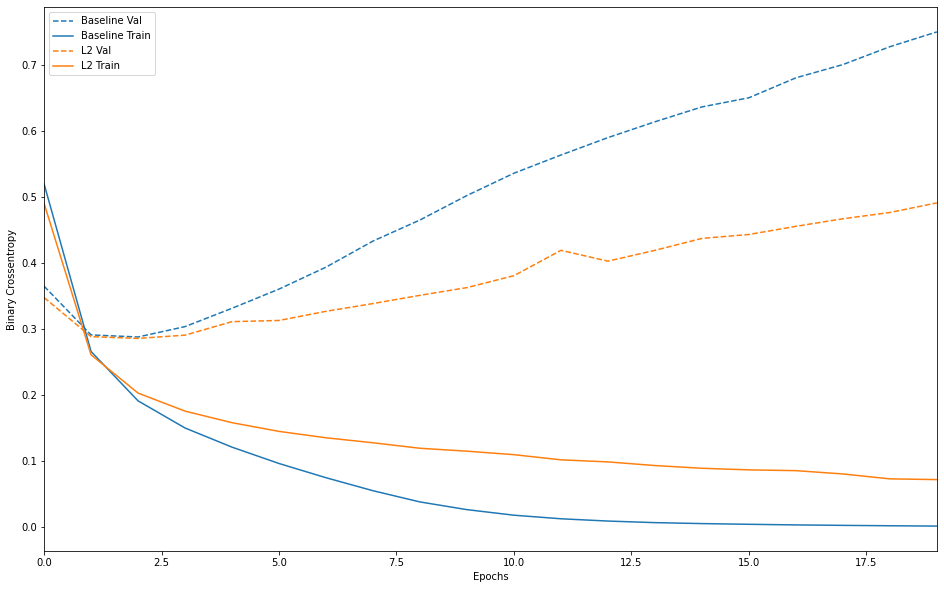

In [21]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [22]:
# dropoutによる過学習防止
dpt_model = keras.models.Sequential(
    [
        keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

dpt_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','binary_crossentropy']
)

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 4s - loss: 0.6266 - accuracy: 0.6373 - binary_crossentropy: 0.6266 - val_loss: 0.4940 - val_accuracy: 0.8496 - val_binary_crossentropy: 0.4940
Epoch 2/20
49/49 - 2s - loss: 0.4769 - accuracy: 0.7920 - binary_crossentropy: 0.4769 - val_loss: 0.3643 - val_accuracy: 0.8777 - val_binary_crossentropy: 0.3643
Epoch 3/20
49/49 - 2s - loss: 0.3850 - accuracy: 0.8567 - binary_crossentropy: 0.3850 - val_loss: 0.3102 - val_accuracy: 0.8846 - val_binary_crossentropy: 0.3102
Epoch 4/20
49/49 - 2s - loss: 0.3187 - accuracy: 0.8914 - binary_crossentropy: 0.3187 - val_loss: 0.2851 - val_accuracy: 0.8883 - val_binary_crossentropy: 0.2851
Epoch 5/20
49/49 - 2s - loss: 0.2764 - accuracy: 0.9095 - binary_crossentropy: 0.2764 - val_loss: 0.2831 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2831
Epoch 6/20
49/49 - 2s - loss: 0.2420 - accuracy: 0.9222 - binary_crossentropy: 0.2420 - val_loss: 0.2888 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.2888
Epoch 7/20
49/49 - 2s - loss

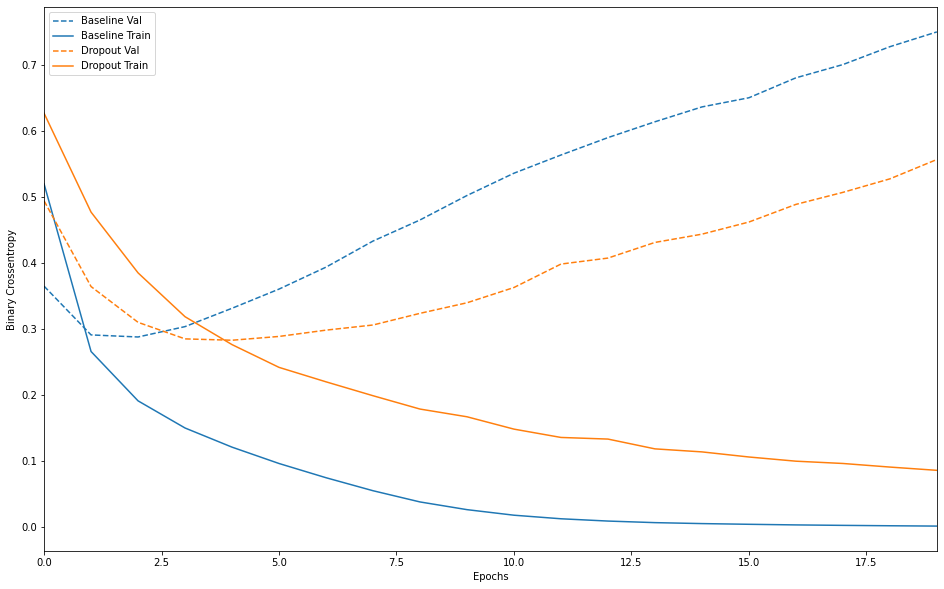

In [24]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [ ]:
# 過学習を防ぐ最も一般的な方法
# - 訓練データを増やす
# - ネットワークのキャパシティを減らす（重みの個数を減らす）
# - 重みの正則化（重みの値の分布を小さくする）
# - 重みのdropout（一部の重みを無視する）
# - データ拡張
# - バッチ正則化